In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error
import pickle
import seaborn as sn


data = pd.read_excel('../dataset.xls')
data.drop('Unnamed: 0', axis = 1, inplace = True)
close_value_mean =data['Close_Value'].mean()
data['Close_Value'].fillna(close_value_mean, inplace = True)

Stage_mode =data['Stage'].mode()[0]
data.loc[data['Stage'] == 'In Progress', 'Stage'] = Stage_mode 

data['Stage'] = data['Stage'].astype('category').cat.codes
data['Customer'] = data['Customer'].astype('category').cat.codes
data['Agent'] = data['Agent'].astype('category').cat.codes
data['SalesAgentEmailID'] = data['SalesAgentEmailID'].astype('category').cat.codes
data['ContactEmailID'] = data['ContactEmailID'].astype('category').cat.codes
data['Product'] = data['Product'].astype('category').cat.codes

data['Created Date'] = data['Created Date'].astype(int)
data['Close Date'] = data['Close Date'].astype(int)

model = GaussianNB()

# # X all rows except stage column and  inprogress value
# X = data[data['Stage']!=0].drop('Stage' , axis=1)
# # Y all rows with just Stage column and inprogress value
# y = data[data['Stage']!=0]['Stage'] #
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) #
# classifired_data = model.fit(X_train,y_train)
# y_pred = classifired_data.predict(data[data['Stage']==0].drop('Stage' , axis=1))
# #replace Stage column with new predications
# data.loc[data['Stage'] == 0, 'Stage'] = y_pred 
# # recalcute codes for stage column to start from zero
# data['Stage'] = data['Stage'].astype('category').cat.codes


X = data.drop('Stage' , axis=1)
y = data['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) # 85% training and 15% test

classifired_data = model.fit(X_train,y_train)

f = open('NaiveBayes.pickle', 'wb+')
pickle.dump(classifired_data, f)
f.close()

y_pred = classifired_data.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print('\n--------------<OVER_FITTING>--------------\n')
train_y_pred =  classifired_data.predict(X_train)
fold_training_error = mean_absolute_error(y_train, train_y_pred) 
print(fold_training_error , 'train')

fold_training_error = mean_absolute_error(y_test,y_pred) 
print(fold_training_error , 'test')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.74      1.00      0.85       861

    accuracy                           0.74      1170
   macro avg       0.37      0.50      0.42      1170
weighted avg       0.54      0.74      0.62      1170

[[  0 309]
 [  0 861]]

--------------<OVER_FITTING>--------------

0.25098039215686274 train
0.2641025641025641 test
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


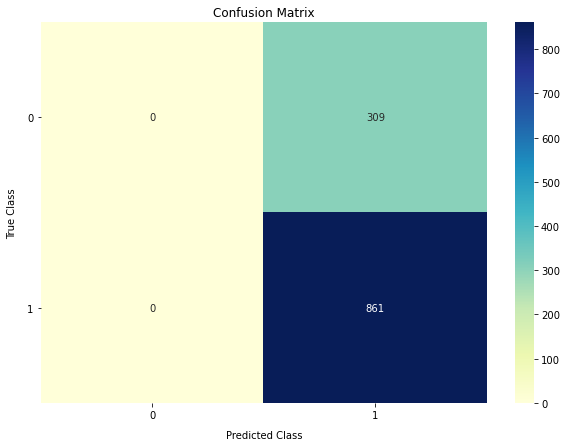

In [18]:
plt.figure(figsize = (10,7))
heat_map = sn.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.ylabel('True Class', labelpad=10)
plt.xlabel('Predicted Class', labelpad=10)
plt.title('Confusion Matrix', y=1.07)
plt.show()